<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Monte_Carlo_Candlestick_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mplfinance
!pip install --upgrade pandas_ta

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta

In [3]:
mu = 0.05
sigma = 0.04
S0 = 100
days = 200

In [4]:
def generate_price(mu, sigma, S0, days):
    price_df = pd.DataFrame({
        'n' : np.arange(24 * 60 * days),
        'W' : np.cumsum(np.random.normal(size = 24 * 60 * days))
    })

    delta_t = 1.0/(365.0 * 24 * 60)
    mu_eff = mu - 0.5 * sigma ** 2

    price_df.eval('S = @S0 * exp(@mu_eff * (n * @delta_t) + @sigma * sqrt(@delta_t) * W)', inplace = True)

    candle_arr = price_df['S'].values.reshape([-1, 24 * 60])

    vol_noise = np.random.normal(size=days)
    open = candle_arr[:, 0]
    high = np.max(candle_arr, axis = 1, keepdims = False)
    low = np.min(candle_arr, axis = 1, keepdims = False)
    close = candle_arr[:, -1]
    volume = 1000 + 500 * (high - low) + 200 * (open - close)


    candlestick_df = pd.DataFrame({
        'Open' : open,
        'High' : high,
        'Low' : low,
        'Close' : close,
        'Volume' : volume
    }, index = pd.date_range(start="2023-01-01", periods = days))

    return candlestick_df

In [5]:
def supertrend_plot(candlestick_df):
     indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.supertrend(high = "High", low = "Low", close = "Close", length=10, multiplier=3)
     ], axis = 1)

     plots = [
         mpf.make_addplot(indicator_df["SUPERTl_10_3.0"], color="green"),
         mpf.make_addplot(indicator_df["SUPERTs_10_3.0"], color="red"),
     ]

     return plots

In [6]:
def adx_plot(candlestick_df, panel):
    indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.adx(high='High', low='Low', close='Close', length=14)
    ], axis = 1)

    plots = [
        mpf.make_addplot(indicator_df['ADX_14'], panel=panel, color='orange', ylabel='ADX'),
        mpf.make_addplot(indicator_df['DMP_14'], panel=panel, color='green', label='+DI'),
        mpf.make_addplot(indicator_df['DMN_14'], panel=panel, color='red', label='-DI')
    ]

    return plots

In [7]:
def macd_plot(candlestick_df, panel):
    indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.macd(close="Close", fast=12, slow=26, signal=9)
    ], axis = 1)

    plots = [
        mpf.make_addplot(indicator_df["MACD_12_26_9"], panel=panel, color="blue", ylabel="MACD"),
        mpf.make_addplot(indicator_df["MACDs_12_26_9"], panel=panel, color="orange"),
        mpf.make_addplot(
            indicator_df["MACDh_12_26_9"],
            type="bar",
            panel=panel,
            color=["green" if val >= 0 else "red" for val in indicator_df["MACDh_12_26_9"]],
            alpha=0.5,
        ),
    ]


    return plots

In [8]:
def rsi_plot(candlestick_df, panel):
    indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.rsi(close="Close", length=14)
    ], axis = 1)

    plots = [
         mpf.make_addplot(indicator_df["RSI_14"], panel = panel, color="purple", ylabel="RSI")
    ]

    return plots

In [9]:
def obv_plot(candlestick_df, panel):
    indicator_df  = pd.concat([
         candlestick_df,
         candlestick_df.ta.obv(close="Close", volume="Volume")
    ], axis = 1)

    plots = [
         mpf.make_addplot(indicator_df['OBV'], panel = panel, color='blue', label='OBV')
    ]

    return plots

In [10]:
def plot_candle_sticks(mu, sigma, S0, days):
    candlestick_df = generate_price(mu, sigma, S0, days)

    plots = (
        supertrend_plot(candlestick_df) +
        obv_plot(candlestick_df, panel = 1) +
        adx_plot(candlestick_df, panel = 2) +
        macd_plot(candlestick_df, panel = 3) +
        rsi_plot(candlestick_df, panel = 4)
    )

    mpf.plot(
        candlestick_df,
        type="candle",  # Candlestick chart
        style="yahoo",  # Chart style
        addplot=plots,
        figscale = 4,
        volume = True,
        panel_ratios=(3, 1, 1, 1, 1)
    )

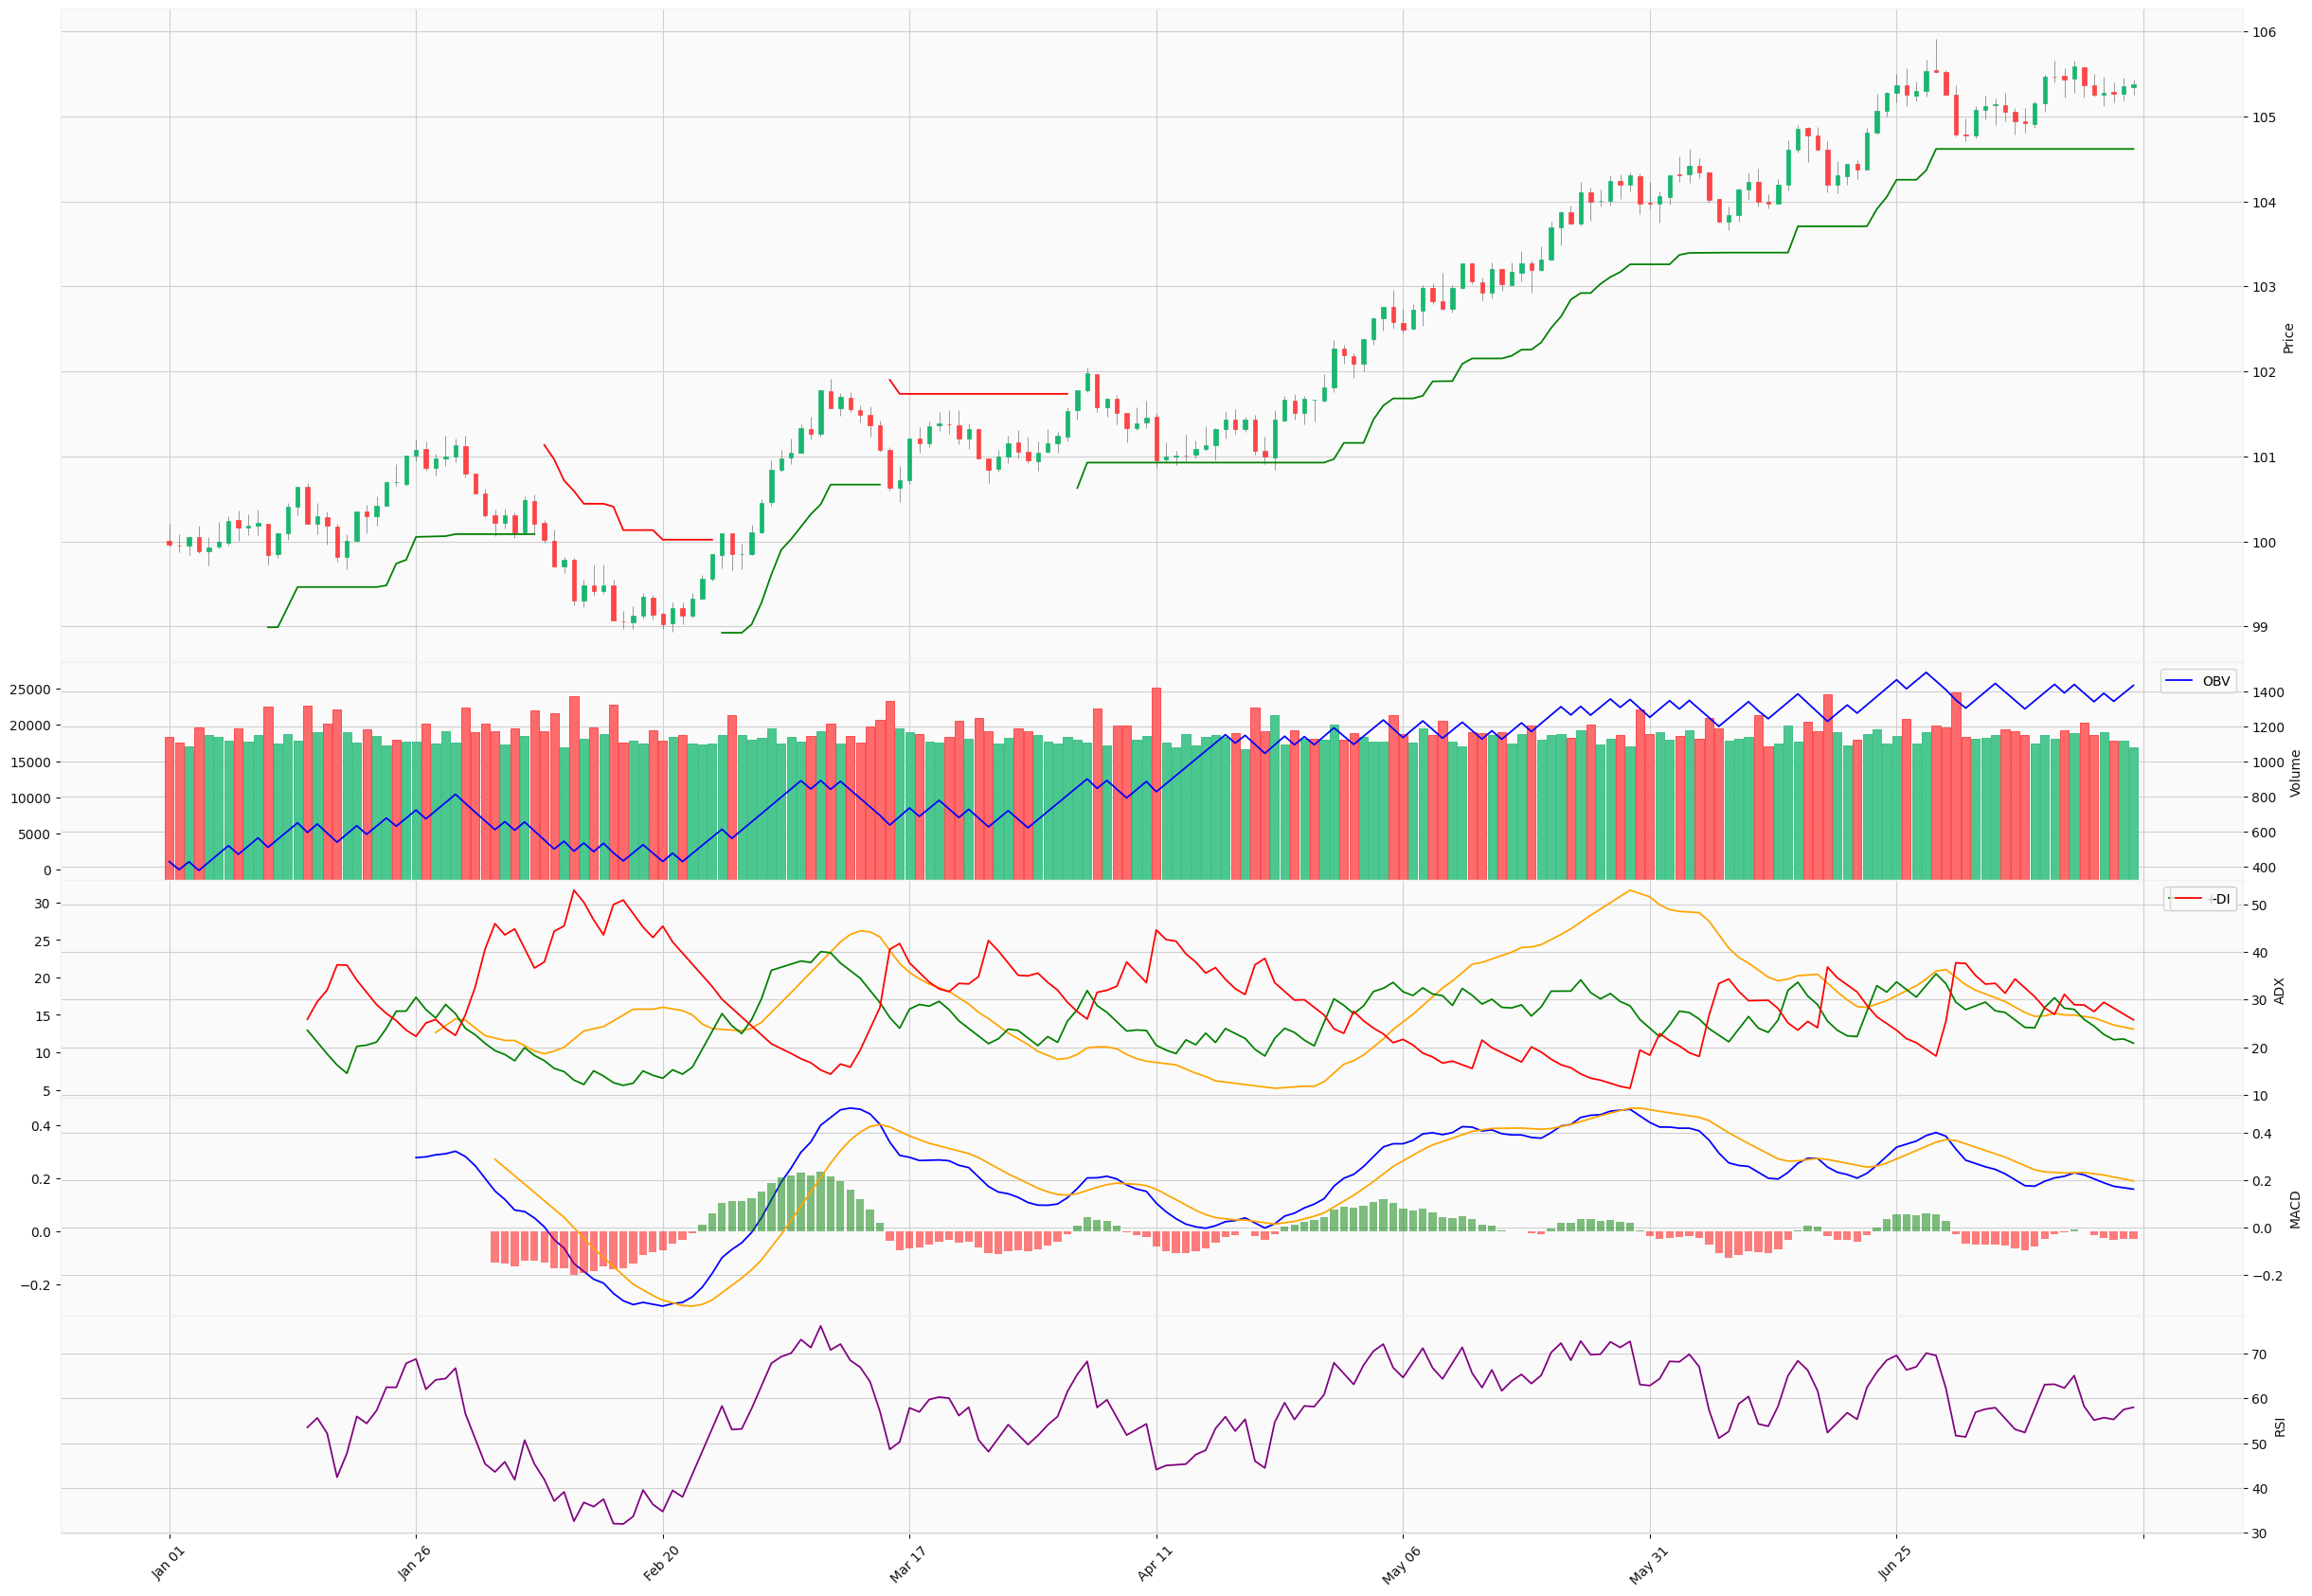

In [11]:
plot_candle_sticks(mu, sigma, S0, days)